In [17]:
#Necessary Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import pandas as pd

In [10]:
#Define Neuron Class
class SingleNeuron:
    def __init__(self, input_size, learning_rate=0.01, epochs=1000):
        # Initialize weights and bias
        self.weights = np.zeros(input_size)
        self.bias = 0
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.losses = []
        self.accuracies = []

    def sigmoid(self, z):
        # Sigmoid activation function
        return 1 / (1 + np.exp(-z))

    def predict(self, X):
        # Compute the linear function z = Xw + b, and apply sigmoid
        z = np.dot(X, self.weights) + self.bias
        return self.sigmoid(z)

    def cost(self, y, y_hat):
        # Compute the binary cross-entropy loss
        m = len(y)
        return -(1/m) * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

    def gradient_descent(self, X, y):
        m = len(y)
        y_hat = self.predict(X)

        # Compute gradients
        dw = (1/m) * np.dot(X.T, (y_hat - y))
        db = (1/m) * np.sum(y_hat - y)

        # Update parameters
        self.weights -= self.learning_rate * dw
        self.bias -= self.learning_rate * db

    def fit(self, X, y):
        for epoch in range(self.epochs):
            self.gradient_descent(X, y)
            y_hat = self.predict(X)
            loss = self.cost(y, y_hat)
            accuracy = np.mean((y_hat >= 0.5).astype(int) == y)

            # Store loss and accuracy for visualization
            self.losses.append(loss)
            self.accuracies.append(accuracy)

            if epoch % 100 == 0:
                print(f'Epoch {epoch}/{self.epochs}, Loss: {loss}, Accuracy: {accuracy * 100:.2f}%')

    def plot_loss_curve(self):
        plt.figure(figsize=(10, 6))
        plt.plot(range(self.epochs), self.losses, color='blue')
        plt.title("Loss Curve", fontsize=16)
        plt.xlabel("Epochs", fontsize=14)
        plt.ylabel("Loss", fontsize=14)
        plt.grid(True)
        plt.show()

    def plot_accuracy_curve(self):
        plt.figure(figsize=(10, 6))
        plt.plot(range(self.epochs), self.accuracies, color='green')
        plt.title("Accuracy Curve", fontsize=16)
        plt.xlabel("Epochs", fontsize=14)
        plt.ylabel("Accuracy", fontsize=14)
        plt.grid(True)
        plt.show()

    def plot_confusion_matrix(self, y_true, y_pred):
        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
        plt.title("Confusion Matrix", fontsize=16)
        plt.xlabel("Predicted", fontsize=14)
        plt.ylabel("True", fontsize=14)
        plt.show()



In [11]:
# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [12]:
# Manually split the data into 80-20 (train-test) split
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Standardize the dataset (important for logistic regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the SingleNeuron model
neuron = SingleNeuron(input_size=X_train.shape[1], learning_rate=0.01, epochs=1000)
neuron.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_prob = neuron.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy on Test Set: {accuracy * 100:.2f}%')

Epoch 0/1000, Loss: 0.6723342343803158, Accuracy: 92.97%
Epoch 100/1000, Loss: 0.2365801694155535, Accuracy: 95.60%
Epoch 200/1000, Loss: 0.1770131107661706, Accuracy: 96.48%
Epoch 300/1000, Loss: 0.15037078446530613, Accuracy: 96.70%
Epoch 400/1000, Loss: 0.13467919971176, Accuracy: 96.92%
Epoch 500/1000, Loss: 0.12411517218651692, Accuracy: 97.80%
Epoch 600/1000, Loss: 0.11640743676947149, Accuracy: 97.80%
Epoch 700/1000, Loss: 0.11047481952415841, Accuracy: 98.24%
Epoch 800/1000, Loss: 0.1057320972371524, Accuracy: 98.24%
Epoch 900/1000, Loss: 0.10183226832694603, Accuracy: 98.24%
Accuracy on Test Set: 98.25%


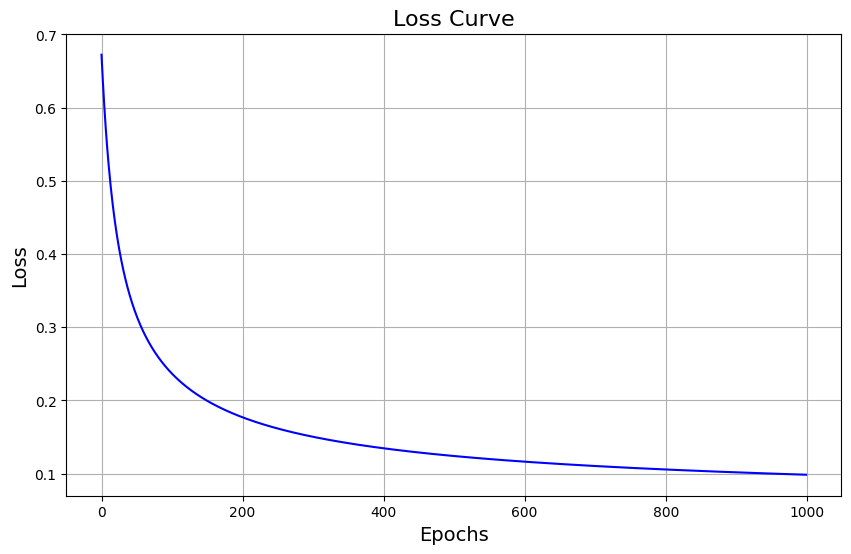

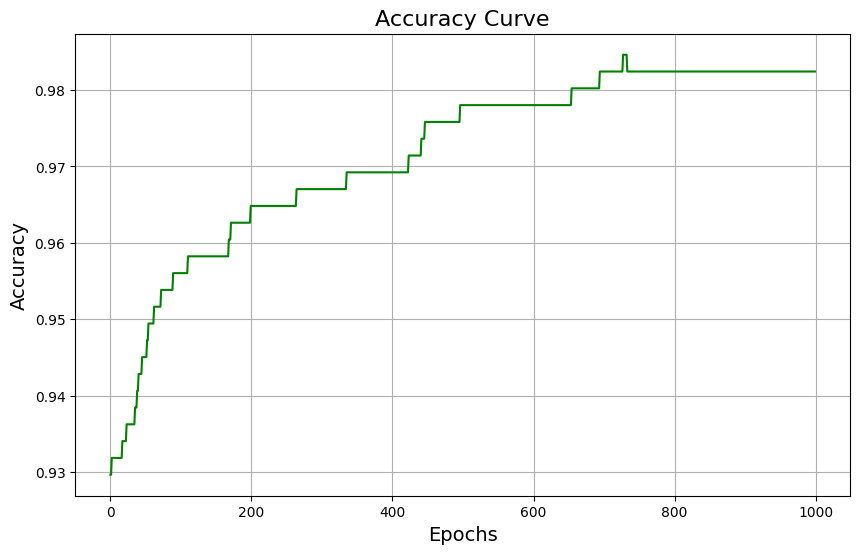

In [13]:
# Visualizations
neuron.plot_loss_curve()
neuron.plot_accuracy_curve()

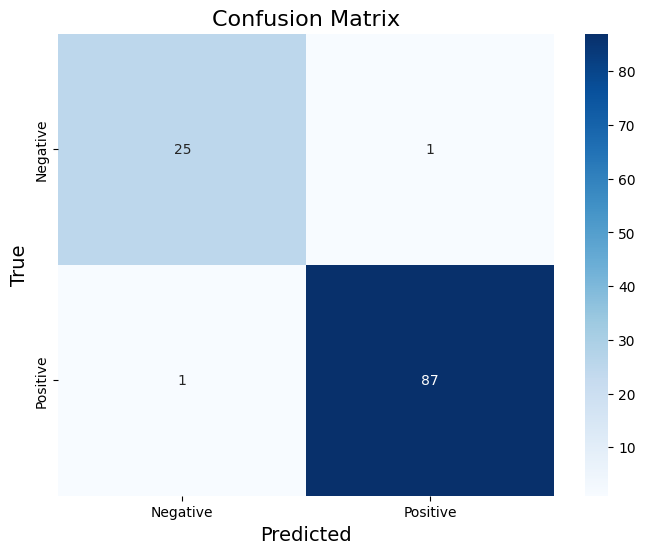

In [14]:
# Confusion Matrix
neuron.plot_confusion_matrix(y_test, y_pred)

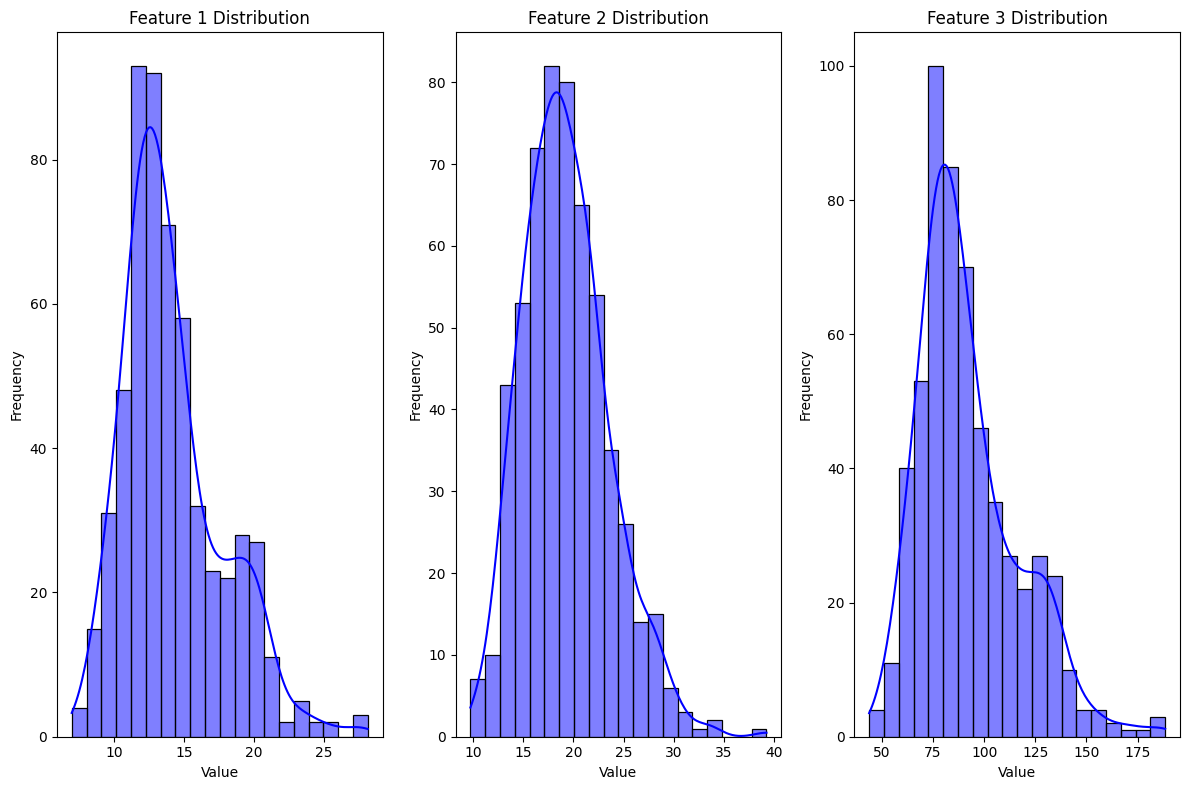

In [21]:
# Feature distributions (for the first 3 features)
plt.figure(figsize=(12, 8))
for i in range(3):
    plt.subplot(1, 3, i+1)
    sns.histplot(X[:, i], kde=True, color='blue', bins=20)
    plt.title(f'Feature {i+1} Distribution')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

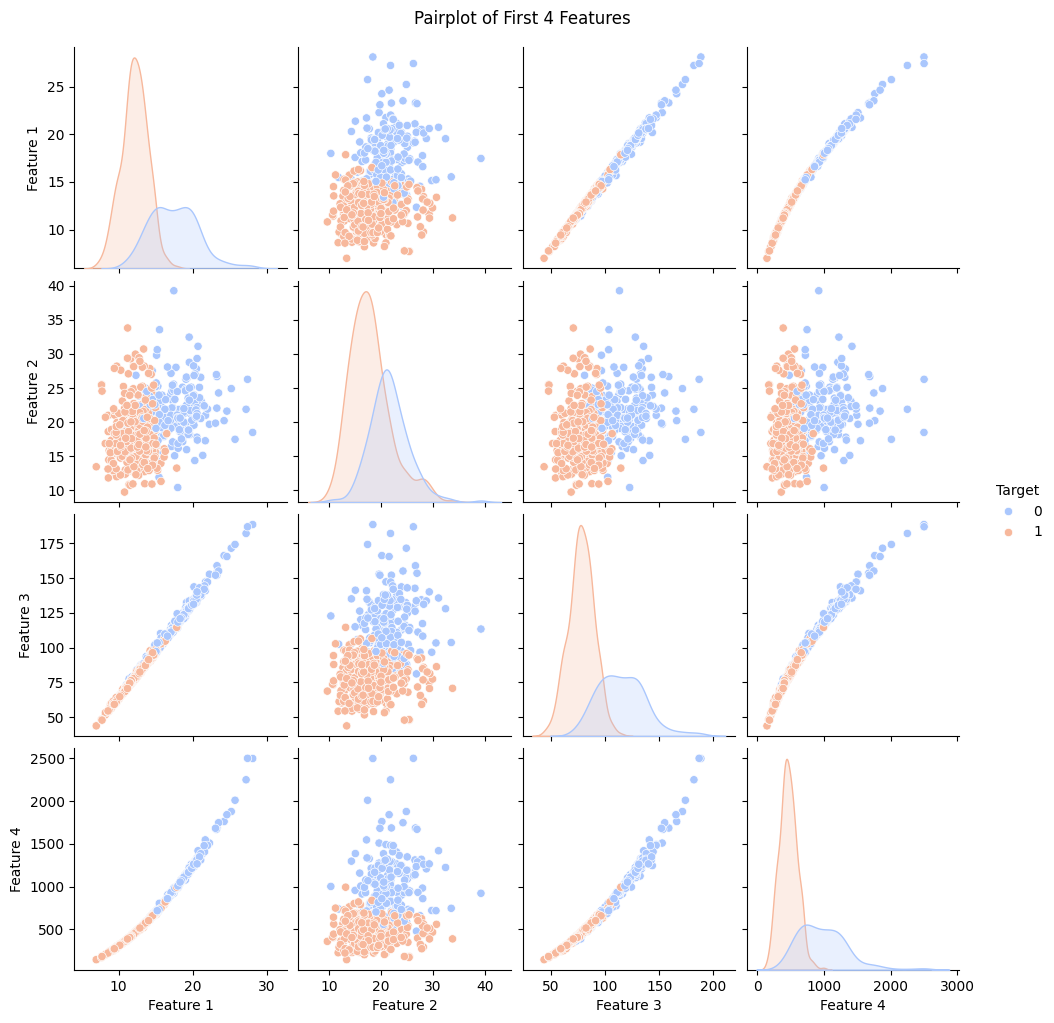

In [22]:
# Pairplot for the first 4 features (visualize relationships between them)
subset = X[:, :4]
df_subset = pd.DataFrame(subset, columns=[f'Feature {i+1}' for i in range(4)])
df_subset['Target'] = y
sns.pairplot(df_subset, hue='Target', palette='coolwarm')
plt.suptitle("Pairplot of First 4 Features", y=1.02)
plt.show()